***

🟡***predicting the employee retention based on using Logistic Regression***

In [2]:
import pandas as pd
data = pd.read_csv('HR_comma_sep.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
import numpy as np
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


**it is a summary of statistical function( it gives the quick overview of the numerical values )**

In [4]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


***here T means transform rows into columns***

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


⚪**it is a function to split the data into categories based on the values in one or more columns
and apply function and combine the results into the dataframe**

In [7]:
data.groupby('left').count()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
left,,,,,,,,,
0,11428,11428,11428,11428,11428,11428,11428,11428,11428
1,3571,3571,3571,3571,3571,3571,3571,3571,3571


**it creates the cross tabulation ot table it shows the frequency distribution of the table( that count the how ofen combinations occur) between the two categorical columns**

In [10]:
pd.crosstab(data['salary'],data['left'])

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


🟢***now analyzing the employees left based on the salary with bar plot***

**Here the left column categories of 0=left and 1=working**

<Axes: title={'center': 'salary vs left'}, xlabel='salary', ylabel='count of employees'>

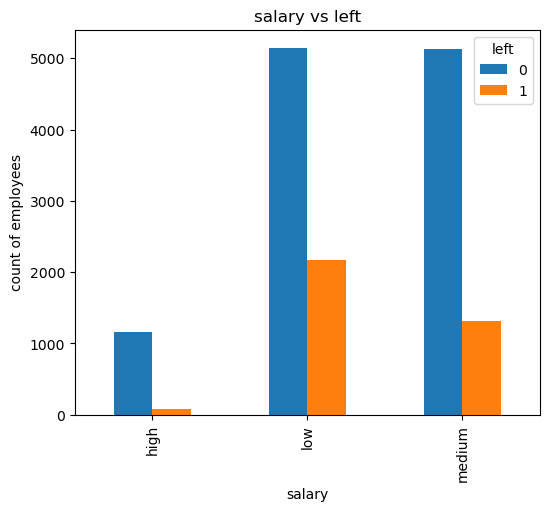

In [13]:
pd.crosstab(data['salary'],data['left']).plot(kind='bar',title='salary vs left',xlabel='salary',ylabel='count of employees',figsize=(6,5))

***Now analyze the employees left in the dapartment***

<Axes: title={'center': 'Department vs left'}, xlabel='departments', ylabel='no of employees left'>

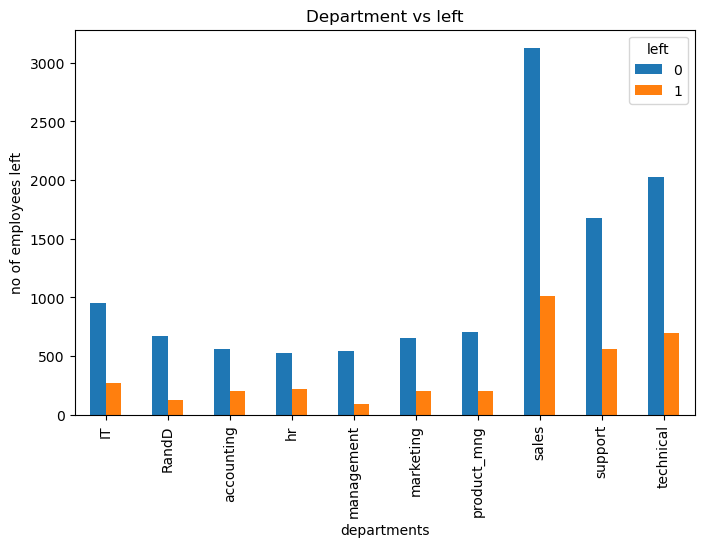

In [14]:
pd.crosstab(data['Department'],data['left'],values=data['left'],aggfunc='count').plot(kind='bar',title='Department vs left',xlabel='departments',ylabel='no of employees left',figsize=(8,5))

In [15]:
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [23]:
train=data[['satisfaction_level','number_project','average_montly_hours','time_spend_company','promotion_last_5years','salary']]
y=data['left']

In [29]:
dummy=pd.get_dummies(train['salary'],drop_first=True,prefix='salary')
dummy

,salary_low,salary_medium
0,True,False
1,False,True
2,False,True
3,True,False
4,True,False
...,...,...
14994,True,False
14995,True,False
14996,True,False
14997,True,False


In [30]:
x=pd.concat([train,dummy],axis='columns')
x.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary,salary_low,salary_medium
0,0.38,2,157,3,0,low,True,False
1,0.80,5,262,6,0,medium,False,True
2,0.11,7,272,4,0,medium,False,True
3,0.72,5,223,5,0,low,True,False
4,0.37,2,159,3,0,low,True,False


In [31]:
x.drop('salary',axis='columns',inplace=True)
x.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary_low,salary_medium
0,0.38,2,157,3,0,True,False
1,0.80,5,262,6,0,False,True
2,0.11,7,272,4,0,False,True
3,0.72,5,223,5,0,True,False
4,0.37,2,159,3,0,True,False


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [34]:
x_train.head()

,satisfaction_level,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary_low,salary_medium
12602,0.10,7,250,4,0,True,False
4889,0.57,4,154,3,0,False,True
1572,0.39,2,154,3,0,True,False
13375,0.91,4,132,4,0,False,True
879,0.82,5,263,5,0,False,True


In [35]:
y_train.head()

12602    1
4889     0
1572     1
13375    0
879      1
Name: left, dtype: int64

In [ ]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

In [43]:
model.predict(x_test)


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [44]:
model.score(x_test,y_test)

0.7771111111111111